In [86]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [87]:
class Product:
    BASKET1 = "PICNIC_BASKET1"
    BASKET2 = "PICNIC_BASKET2"
    JAMS = "JAMS"
    CROISSANTS = "CROISSANTS"
    DJEMBES = "DJEMBES"
    SYNTHETIC = "SYNTHETIC"
    SPREAD = "SPREAD"

In [88]:
# prices = pd.read_csv('round2/prices_round_2_day_1.csv', sep=';')
# trades = pd.read_csv('round2/trades_round_2_day_1_nn.csv', sep=';')
prices = pd.concat([pd.read_csv(f'round2/prices_round_2_day_{i}.csv', sep=';') for i in range(-1, 2)], ignore_index=True)
trades = pd.concat([pd.read_csv(f'round2/trades_round_2_day_{i}_nn.csv', sep=';') for i in range(-1, 2)], ignore_index=True)

In [89]:
prices['swmid'] = (prices['bid_price_1'] * prices['ask_volume_1'] + prices['ask_price_1'] * prices['bid_volume_1']) / (prices['ask_volume_1'] + prices['bid_volume_1'])

In [90]:
croissants = prices[prices["product"] == "CROISSANTS"].reset_index(drop=True).copy()
jams = prices[prices["product"] == "JAMS"].reset_index(drop=True).copy()
djembes = prices[prices["product"] == "DJEMBES"].reset_index(drop=True).copy()
basket1 = prices[prices["product"] == 'PICNIC_BASKET1'].reset_index(drop=True).copy()
basket2 = prices[prices["product"] == 'PICNIC_BASKET2'].reset_index(drop=True).copy()

In [91]:
[croissants, jams, djembes, basket1, basket2] = [df.drop(columns=['product']) for df in [croissants, jams, djembes, basket1, basket2]]

In [92]:
croissants = croissants.rename(columns={col: col + '_' + Product.CROISSANTS for col in croissants.columns if col not in ['timestamp', 'day']})
jams = jams.rename(columns={col: col + '_' + Product.JAMS for col in jams.columns if col not in ['timestamp', 'day']})
djembes = djembes.rename(columns={col: col + '_' + Product.DJEMBES for col in djembes.columns if col not in ['timestamp', 'day']})
basket1 = basket1.rename(columns={col: col + '_' + Product.BASKET1 for col in basket1.columns if col not in ['timestamp', 'day']})
basket2 = basket2.rename(columns={col: col + '_' + Product.BASKET2 for col in basket2.columns if col not in ['timestamp', 'day']})

`PICNIC_BASKET1` contains three products: 

1. Six (6) `CROISSANTS`
2. Three (3) `JAMS`
3. One (1) `DJEMBE`

`PICNIC_BASKET2` contains just two products: 

1. Four (4) `CROISSANTS`
2. Two (2) `JAMS`

Aside from the Picnic Baskets, you can now also trade the three products individually on the island exchange. 

Position limits for the newly introduced products:

- `CROISSANT`: 250
- `JAM`: 350
- `DJEMBE`: 60
- `PICNIC_BASKET1`: 60
- `PICNIC_BASKET2`: 100

In [93]:
# join croissants, james, djembes, basket1, basket2 on timestamp
mk = croissants.merge(jams, on=['day', 'timestamp'])
mk = mk.merge(djembes, on=['day', 'timestamp'])
mk = mk.merge(basket1, on=['day', 'timestamp'])
mk = mk.merge(basket2, on=['day', 'timestamp'])

In [103]:
mk

,day,timestamp,bid_price_1_CROISSANTS,bid_volume_1_CROISSANTS,bid_price_2_CROISSANTS,bid_volume_2_CROISSANTS,bid_price_3_CROISSANTS,bid_volume_3_CROISSANTS,ask_price_1_CROISSANTS,ask_volume_1_CROISSANTS,...,mid_price_PICNIC_BASKET2,profit_and_loss_PICNIC_BASKET2,swmid_PICNIC_BASKET2,swmid_synth0,swmid_synth1,swmid_synth2,swmid_synth3,synth1_sma,synth1_std,synth1_zscore
0,-1,0,4304,112,NaN,NaN,NaN,NaN,4305,112,...,30609.0,0.0,30609.000000,4.090909,50.000000,-45.909091,-141.818182,NaN,NaN,NaN
1,-1,100,4304,133,NaN,NaN,NaN,NaN,4305,133,...,30613.0,0.0,30611.888889,2.447368,52.888889,-50.441520,-153.771930,NaN,NaN,NaN
2,-1,200,4304,110,NaN,NaN,NaN,NaN,4305,110,...,30615.0,0.0,30613.695652,3.218310,53.695652,-50.477342,-154.650337,NaN,NaN,NaN
3,-1,300,4304,118,NaN,NaN,NaN,NaN,4305,118,...,30620.5,0.0,30618.476190,0.500000,56.476190,-55.976190,-168.428571,NaN,NaN,NaN
4,-1,400,4305,142,NaN,NaN,NaN,NaN,4306,142,...,30621.0,0.0,30620.500000,-10.500000,54.500000,-65.000000,-184.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,999500,4268,120,NaN,NaN,NaN,NaN,4269,120,...,30117.5,0.0,30119.736842,131.250275,5.753509,125.496766,245.240023,-23.696950,10.242472,2.875327
29996,1,999600,4268,103,NaN,NaN,NaN,NaN,4269,103,...,30115.0,0.0,30116.272727,132.325581,3.272727,129.052854,254.832981,-23.676467,10.387464,2.594396
29997,1,999700,4268,126,NaN,NaN,NaN,NaN,4269,126,...,30112.0,0.0,30111.500000,126.500000,-1.500000,128.000000,257.500000,-23.680568,10.314576,2.150410
29998,1,999800,4268,42,4267.0,80.0,NaN,NaN,4269,122,...,30112.5,0.0,30110.555556,137.963415,-2.468835,140.432249,283.333333,-23.704706,10.162370,2.089657


In [95]:
synthetics = [
    {
        Product.BASKET1: 1,
        Product.CROISSANTS: -6,
        Product.JAMS: -3,
        Product.DJEMBES: -1
    },
    {
        Product.BASKET2: 1,
        Product.CROISSANTS: -4,
        Product.JAMS: -2
    },
    {
        Product.BASKET1: 1,
        Product.BASKET2: -1,
        Product.CROISSANTS: -2,
        Product.JAMS: -1,
        Product.DJEMBES: -1
    },
    {
        Product.BASKET1: 2,
        Product.BASKET2: -3,
        Product.DJEMBES: -2
    },
]

for i in range(len(synthetics)):
    mk[f'swmid_synth{i}'] = 0
    synthetic = synthetics[i]
    for product, weight in synthetic.items():
        mk[f'swmid_synth{i}'] += mk[f'swmid_{product}'] * weight

In [ ]:
q = (mk['day'] == -1)
synth = 2



mk[f'synth{synth}_sma'] = mk[f'swmid_synth{synth}'].rolling(window=60).mean()
mk[f'synth{synth}_std'] = mk[f'swmid_synth{synth}'].rolling(window=50).std()
mk[f'synth{synth}_zscore'] = (mk[f'swmid_synth{synth}'] - mk[f'synth{synth}_sma']) / mk[f'synth{synth}_std']

fig = go.Figure()

fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'swmid_synth{synth}'], mode='lines', name=f'SWMid Synth{synth}'))
# fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'synth{synth}_sma'], mode='lines', name=f'Synth{synth} SMA'))
# fig.add_trace(go.Scatter(x=mk.loc[q, 'timestamp'], y=mk.loc[q, f'synth{synth}_zscore'], mode='lines', name=f'Synth{synth} Z-Score', yaxis='y2'))

# fig.update_layout(yaxis2=dict(title='Z Score', overlaying='y', side='right'))
# fig.update_layout(title=f'Synth{synth} Z-Score', xaxis_title='Timestamp', yaxis_title='Z-Score')
fig.show()

In [116]:
mk['swmid_synth0'].pct_change()

0              NaN
1        -0.401754
2         0.315008
3        -0.844639
4       -22.000000
           ...    
29995     0.012438
29996     0.008193
29997    -0.044025
29998     0.090620
29999     0.004756
Name: swmid_synth0, Length: 30000, dtype: float64

In [127]:
q = mk['day'] == 1

fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_synth0'].pct_change(), mode='lines', name='SWMid Synth0'))
fig.update_layout(title='SWMid Synth0 vs Timestamp', xaxis_title='Timestamp', yaxis_title='SWMid Synth0')
fig.show()

In [129]:
mk['swmid_synthbask'] = 6 * mk['swmid_CROISSANTS'] + 3 * mk['swmid_JAMS'] + 1 * mk['swmid_DJEMBES'] + 1

In [ ]:
# plot of swmid_synthbask
fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_synthbask'], mode='lines', name='SWMid SynthBask'))
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=mk[q]['swmid_PICNIC_BASKET1'], mode='lines', name='Basket1'))
fig.add_trace(go.Scatter(x=mk[q]['timestamp'], y=[mk[q]['swmid_synthbask'].mean()] * len(mk[q]['timestamp']), mode='lines', name='Mean'))
fig.update_layout(title='SWMid SynthBask vs Timestamp', xaxis_title='Timestamp', yaxis_title='SWMid SynthBask')
fig.show()

In [138]:
# plot pct change of synthbasket change against basket1 change
fig = go.Figure()
fig.add_trace(go.Scatter(x=mk[q]['swmid_synthbask'].pct_change(), y=mk[q]['swmid_PICNIC_BASKET1'].pct_change().shift(30), mode='markers', name='SWMid SynthBask vs Basket1'))
fig.update_layout(title='SWMid SynthBask vs Basket1', xaxis_title='SWMid SynthBask', yaxis_title='Basket1')
fig.show()

ValueError: supplied range of [-inf, inf] is not finite

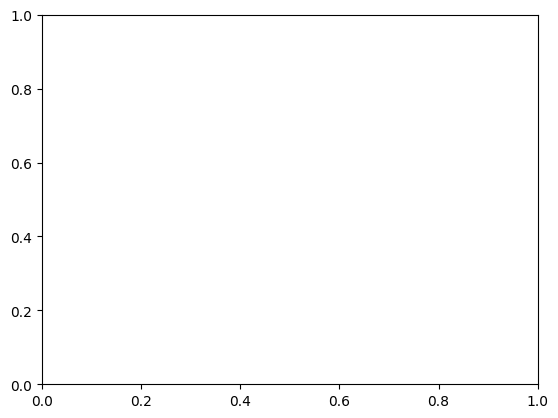

In [ ]:
mk[q]['swmid_synth0'].pct_change()

In [97]:
mk.groupby('day')['swmid_synth1'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,58.090589,51.870394,-102.119048,39.654814,66.000000,93.547980,149.593496
0,10000.0,-3.858777,55.128494,-122.736842,-43.843318,-12.569952,34.421825,134.450292
1,10000.0,36.469181,55.148739,-105.892208,-9.250658,43.500000,73.500000,148.642281


In [98]:
mk.groupby('day')['swmid_synth2'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,11.963393,65.660621,-146.694838,-39.860788,8.126541,64.468781,168.944444
0,10000.0,47.781266,63.231961,-96.094686,4.384151,54.859748,92.462005,208.071429
1,10000.0,-4.112082,98.243357,-196.706897,-88.781515,-19.954685,89.563709,199.308610


In [99]:
mk.groupby('day')['swmid_synth0'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,70.053983,78.667021,-175.564951,19.450462,80.236501,120.500000,250.277618
0,10000.0,43.922489,82.788898,-130.704588,-10.010850,44.000000,110.404215,222.000000
1,10000.0,32.357099,89.161706,-197.155172,-19.490476,23.159344,102.056772,230.111570


In [100]:
mk.groupby('day')['swmid_synth3'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
-1,10000.0,-34.163803,146.841805,-362.000000,-153.854933,-28.114379,86.966169,321.388889
0,10000.0,99.421310,139.280776,-300.000000,-12.131410,133.083882,202.862575,414.666667
1,10000.0,-44.693345,226.130655,-535.406593,-241.000000,-79.238662,132.779388,402.397129


In [183]:
mk['spread1_zscore'].describe()

count    9701.000000
mean        0.252552
std         3.484058
min       -10.157279
25%        -2.210694
50%         0.050785
75%         2.689442
max        17.789029
Name: spread1_zscore, dtype: float64

day0 spread1 zscore summary
count    9701.000000
mean        0.322448
std         3.353061
min        -9.998620
25%        -2.123352
50%         0.228565
75%         2.708731
max        11.672497
Name: spread1_zscore, dtype: float64

day1
day0 spread1 zscore summary
count    9701.000000
mean        0.322448
std         3.353061
min        -9.998620
25%        -2.123352
50%         0.228565
75%         2.708731
max        11.672497
Name: spread1_zscore, dtype: float64

day1



In [ ]:
spread = mk[['timestamp', 'swmid_spread1']].copy()
spread.rename(columns={'swmid_spread1': 'swmid'}, inplace=True)
spread['spread'] = spread['swmid'].copy()

spread2 = mk[['timestamp', 'swmid_spread2']].copy()
spread2.rename(columns={'swmid_spread2': 'swmid'}, inplace=True)
spread2['spread'] = spread2['swmid'].copy()

In [152]:
from tqdm import tqdm

def cross_spread(cash, quantity):
    return cash - abs(quantity) * 10

def backtest(spread, thresh, target_position, std_window, sma_window, verbose=False):
    cash = 0
    position = 0
    pnl_hist = []
    position_hist = []
    cash_hist = []
    spread[f'std{std_window}'] = spread['spread'].rolling(window=std_window).std()
    spread[f'sma{sma_window}'] = spread['spread'].rolling(window=sma_window).mean()
    z_score = (spread['spread'].to_numpy() - spread[f'sma{sma_window}']) / spread[f'std{std_window}'].to_numpy()
    spread['spread_z'] = z_score
    for index, row in spread.iterrows():
        if index == 0:
            continue
        swmid = row['swmid']
        
        if row['spread_z'] > thresh and position != -target_position:
        
            
            quantity = -target_position - position
            cash -= (-target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = -target_position
            
            if verbose:
                print(f"SELL {quantity} AT PRICE {swmid} AT TIME {row['timestamp']}")
        
        if row['spread_z'] < -thresh and position != target_position:
            quantity = target_position - position
            cash -= (target_position - position) * swmid
            cash = cross_spread(cash, quantity)
            position = target_position
            
            if verbose:
                print(f"BUY {quantity} FOR PRICE {swmid} AT TIME {row['timestamp']}")
    
        position_hist.append(position)
        cash_hist.append(cash)
        pnl_hist.append(cash + position * swmid)
        
    if verbose:
        print(f"PNL: {pnl_hist[-1]}")
        
    return pnl_hist


In [163]:
position_opt = [60]
thresh_opt = [1,2,3,5,6,7,7.5,8,9,10,15,20,25]
std_window_opt = [10,20,25,30,35,40,50]
sma_window_opt = [10,20,25,30,35,40,50,75, 100, 125, 150, 200, 300, 500]
opt = []
for thresh in tqdm(thresh_opt): 
    for std_window in std_window_opt: 
        for sma_window in sma_window_opt:
            for position in position_opt:
                pnl = backtest(spread2, thresh, position, std_window, sma_window)
                opt.append({"thresh": thresh, "position": position, "std_window": std_window, "sma_window": sma_window, "pnl": pnl})
#                 print("="*80)
#                 print(f"Thresh: {thresh}, Position: {position}, Std Window: {std_window}, PnL: {pnl[-1]}")
#                 print("="*80)

100%|██████████| 13/13 [02:55<00:00, 13.46s/it]


In [164]:
spread['spread'].mean()

np.float64(43.922489021349016)

In [165]:
opt.sort(key=lambda x: x['pnl'][-1], reverse=True)
top_3_pnl = opt[:3]
pnl_graph = top_3_pnl[0]['pnl']

fig = go.Figure()
fig.add_trace(go.Scatter(x=spread.index, y=pnl_graph, mode='lines', name='PnL'))
fig.show()

In [167]:
top_3_pnl = opt[:3]
top_pnl_params = top_3_pnl[0]
for params in top_3_pnl:
    print(f"thresh: {params['thresh']}, std_window: {params['std_window']}, sma_window: {params['sma_window']}, pnl: {params['pnl'][-1]}")

thresh: 8, std_window: 25, sma_window: 125, pnl: 12486.761331593298
thresh: 10, std_window: 25, sma_window: 150, pnl: 11953.98168192296
thresh: 5, std_window: 20, sma_window: 35, pnl: 10530.0


spread1
thresh: 7, std_window: 35, sma_window: 125, pnl: 24212.82352941198
thresh: 7, std_window: 50, sma_window: 200, pnl: 21864.714339038765
thresh: 5, std_window: 50, sma_window: 125, pnl: 21512.814052237227

spread2
thresh: 8, std_window: 25, sma_window: 125, pnl: 12486.761331593298
thresh: 10, std_window: 25, sma_window: 150, pnl: 11953.98168192296
thresh: 5, std_window: 20, sma_window: 35, pnl: 10530.0

In [166]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=spread.index, y=pnl_graph, mode='lines', name='PnL'))
# fig.show()

for o in opt[:5]:
    # graph the pnl
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=spread.index, y=o['pnl'], mode='lines', name='PnL'))
    fig.update_layout(title=f"Thresh: {o['thresh']}, Position: {o['position']}, Std Window: {o['std_window']}, Sma Window: {o['sma_window']}, PnL: {o['pnl'][-1]}")
    fig.show()
    